In [1]:
import pandas as pd

In [2]:
import re

In [82]:
import numpy as np 
from IPython.display import display

### Data

In [3]:
data = pd.read_csv('supermarket_data.csv'\
                 , sep=','\
                 , encoding='utf-8'\
                 , dtype={'SHOP_DATE': 'str', 'SHOP_HOUR': 'int', 'BASKET_ID': 'str' }\
                 )
pd.set_option('display.max_columns', None)

In [4]:
print(data.shape)

(671914, 8)


In [5]:
data.head(20)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
0,20071006,21,9.94108E+14,CUST0000153531,STORE00001,PRD0901391,1,0.37
1,20070201,15,9.94104E+14,CUST0000219191,STORE00002,PRD0901915,1,5.08
2,20071103,13,9.94108E+14,CUST0000526979,STORE00003,PRD0903379,1,2.36
3,20070206,18,9.94104E+14,CUST0000913709,STORE00004,PRD0903305,1,0.20
4,20071015,19,9.94108E+14,CUST0000961285,STORE00001,PRD0903387,1,1.65
5,20080615,12,9.94111E+14,CUST0000988001,STORE00001,PRD0903764,3,1.59
6,20080513,15,9.94111E+14,CUST0000099658,STORE00001,PRD0903691,1,3.85
7,20080216,16,9.9411E+14,CUST0000769635,STORE00002,PRD0900851,1,1.69
8,20070712,13,9.94107E+14,CUST0000694605,STORE00002,PRD0903130,5,2.05
9,20080413,11,9.94111E+14,CUST0000403914,STORE00004,PRD0900183,7,1.05


In [6]:
import datetime

In [7]:
data['day_of_week'] = data['SHOP_DATE'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d').strftime('%A'))

In [8]:
data.head(20)

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND,day_of_week
0,20071006,21,9.94108E+14,CUST0000153531,STORE00001,PRD0901391,1,0.37,Saturday
1,20070201,15,9.94104E+14,CUST0000219191,STORE00002,PRD0901915,1,5.08,Thursday
2,20071103,13,9.94108E+14,CUST0000526979,STORE00003,PRD0903379,1,2.36,Saturday
3,20070206,18,9.94104E+14,CUST0000913709,STORE00004,PRD0903305,1,0.20,Tuesday
4,20071015,19,9.94108E+14,CUST0000961285,STORE00001,PRD0903387,1,1.65,Monday
5,20080615,12,9.94111E+14,CUST0000988001,STORE00001,PRD0903764,3,1.59,Sunday
6,20080513,15,9.94111E+14,CUST0000099658,STORE00001,PRD0903691,1,3.85,Tuesday
7,20080216,16,9.9411E+14,CUST0000769635,STORE00002,PRD0900851,1,1.69,Saturday
8,20070712,13,9.94107E+14,CUST0000694605,STORE00002,PRD0903130,5,2.05,Thursday
9,20080413,11,9.94111E+14,CUST0000403914,STORE00004,PRD0900183,7,1.05,Sunday


In [9]:
data.isnull().sum()

SHOP_DATE      0
SHOP_HOUR      0
BASKET_ID      0
CUST_CODE      0
STORE_CODE     0
PROD_CODE      0
QUANTITY       0
SPEND          0
day_of_week    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671914 entries, 0 to 671913
Data columns (total 9 columns):
SHOP_DATE      671914 non-null object
SHOP_HOUR      671914 non-null int32
BASKET_ID      671914 non-null object
CUST_CODE      671914 non-null object
STORE_CODE     671914 non-null object
PROD_CODE      671914 non-null object
QUANTITY       671914 non-null int64
SPEND          671914 non-null float64
day_of_week    671914 non-null object
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 43.6+ MB


In [11]:
data.describe()

,SHOP_HOUR,QUANTITY,SPEND
count,671914.000000,671914.000000,671914.000000
mean,14.745869,1.514344,1.852796
std,3.551738,1.668037,2.589564
min,8.000000,1.000000,0.010000
25%,12.000000,1.000000,0.750000
50%,15.000000,1.000000,1.210000
75%,17.000000,1.000000,2.040000
max,21.000000,73.000000,189.630000


In [12]:
print("Dataset contains {} row and {} colums".format(data.shape[0],data.shape[1]))

Dataset contains 671914 row and 9 colums


In [13]:
print ('Number of customers: ', len(data.CUST_CODE.unique()))
print ('Number of times the purchase was made:', len(data.BASKET_ID.unique()))
print ('Number of stores: ', len(data.STORE_CODE.unique()))
print ('Number of product: ', len(data.PROD_CODE.unique()))

Number of customers:  4891
Number of times the purchase was made: 9
Number of stores:  4
Number of product:  4978


In [14]:
data['SHOP_DATE'].head(20)

0     20071006
1     20070201
2     20071103
3     20070206
4     20071015
5     20080615
6     20080513
7     20080216
8     20070712
9     20080413
10    20080604
11    20071215
12    20070316
13    20070607
14    20070615
15    20080104
16    20080205
17    20071101
18    20070216
19    20071231
Name: SHOP_DATE, dtype: object

In [15]:
data['SHOP_HOUR'].unique()

array([21, 15, 13, 18, 19, 12, 16, 11, 17, 14, 20, 10,  9,  8],
      dtype=int64)

### Store

In [96]:
data_day = data.groupby(['STORE_CODE', 'day_of_week', 'SHOP_HOUR'])['CUST_CODE'].unique().reset_index()
data_day['total_cust'] = data_day['CUST_CODE'].apply(lambda x: len(x))
data_day = data_day.drop(columns='CUST_CODE')

In [97]:
data_day.head(20)

,STORE_CODE,day_of_week,SHOP_HOUR,total_cust
0,STORE00001,Friday,8,130
1,STORE00001,Friday,9,114
2,STORE00001,Friday,10,140
3,STORE00001,Friday,11,183
4,STORE00001,Friday,12,193
5,STORE00001,Friday,13,243
6,STORE00001,Friday,14,230
7,STORE00001,Friday,15,238
8,STORE00001,Friday,16,237
9,STORE00001,Friday,17,206


In [98]:
data_day.max()

STORE_CODE     STORE00004
day_of_week     Wednesday
SHOP_HOUR              21
total_cust            245
dtype: object

In [99]:
data_day.min()

STORE_CODE     STORE00001
day_of_week        Friday
SHOP_HOUR               8
total_cust             44
dtype: object

In [103]:
import matplotlib.pyplot as plt
import os
import seaborn as sns

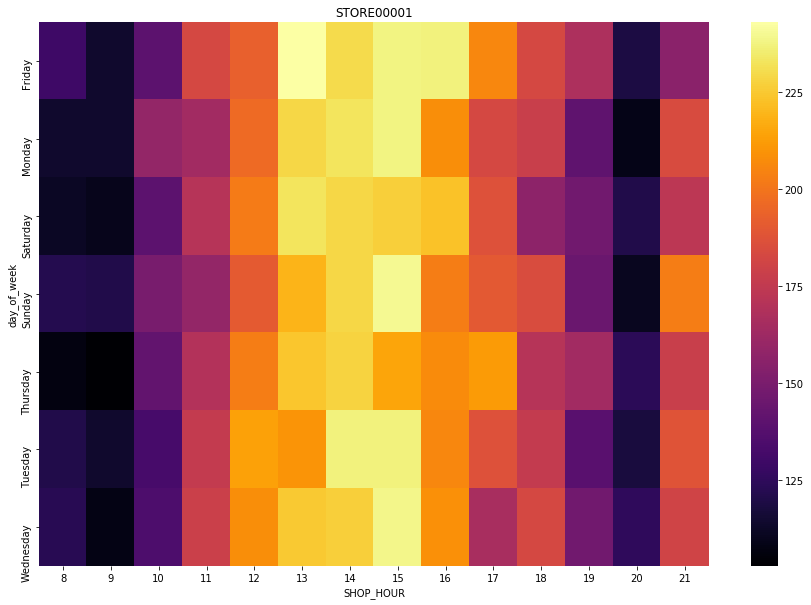

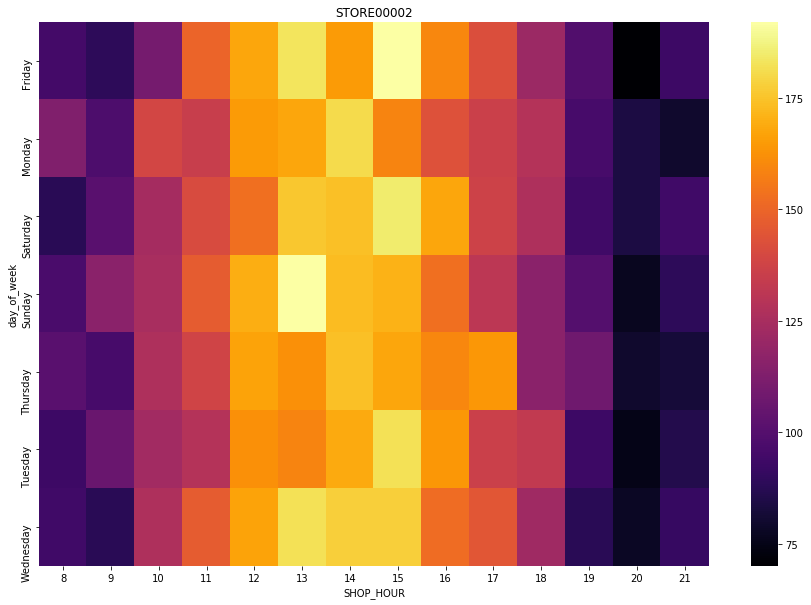

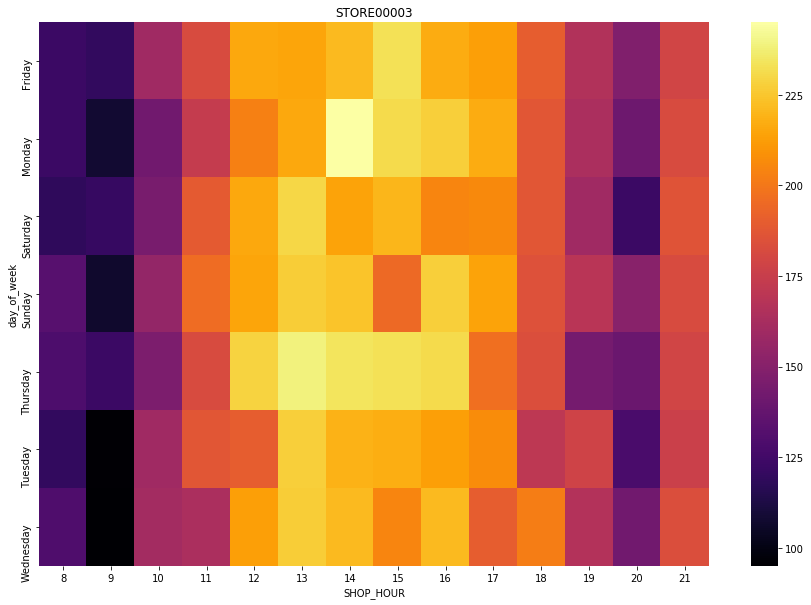

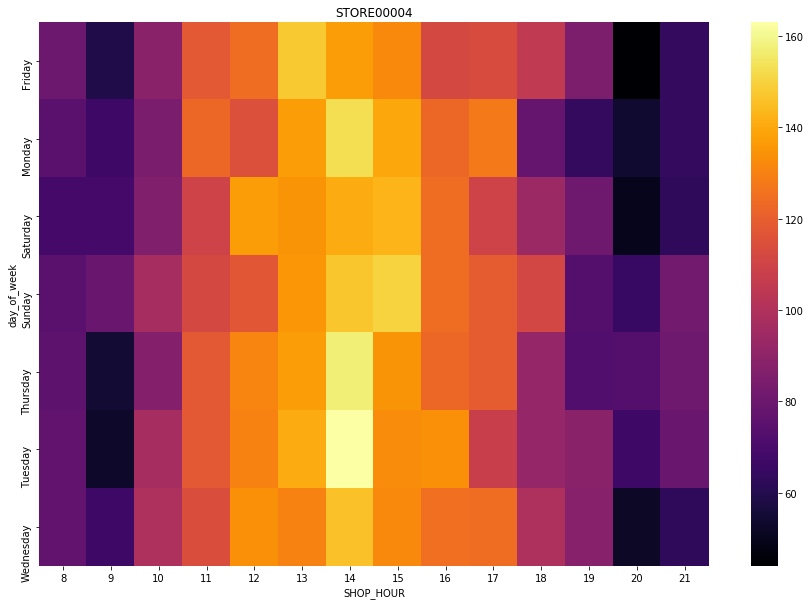

In [115]:
for i in data_day['STORE_CODE'].unique():
    tmp = data_day[data_day['STORE_CODE']==i]

    loss_cir_m = tmp.pivot("day_of_week",'SHOP_HOUR', "total_cust")
    plt.figure(figsize=(15, 10))
    plt.title(i)
    sns.heatmap(loss_cir_m, cmap="inferno")


In [105]:
data_freq = data.groupby(['STORE_CODE', 'day_of_week', 'SHOP_HOUR'])['CUST_CODE'].unique().reset_index()
data_freq['total_cust'] = data_freq['CUST_CODE'].apply(lambda x: len(x))
data_freq = data_freq.drop(columns=['CUST_CODE', 'SHOP_HOUR'])

In [107]:
data_freq.head(10)

,STORE_CODE,day_of_week,total_cust
0,STORE00001,Friday,130
1,STORE00001,Friday,114
2,STORE00001,Friday,140
3,STORE00001,Friday,183
4,STORE00001,Friday,193
5,STORE00001,Friday,243
6,STORE00001,Friday,230
7,STORE00001,Friday,238
8,STORE00001,Friday,237
9,STORE00001,Friday,206


In [91]:
data_freq.max()

STORE_CODE     STORE00004
day_of_week     Wednesday
cnt_cust              245
dtype: object

In [93]:
data_freq.min()

STORE_CODE     STORE00001
day_of_week        Friday
cnt_cust               44
dtype: object

### Product

In [20]:
print ('The best sellers product :\n', data.groupby('PROD_CODE')['QUANTITY'].sum().sort_values(ascending=False))

The best sellers product :
 PROD_CODE
PRD0903678    92694
PRD0904358    15738
PRD0903052    15587
PRD0900121    12861
PRD0903269     7234
PRD0901265     6225
PRD0904044     5728
PRD0903130     5667
PRD0900830     4902
PRD0903078     4825
PRD0903228     4407
PRD0901672     3858
PRD0902873     3584
PRD0900173     3490
PRD0901887     3441
PRD0903074     3382
PRD0903788     3290
PRD0901585     3013
PRD0904250     2990
PRD0900254     2887
PRD0902728     2876
PRD0900986     2723
PRD0904976     2538
PRD0903677     2507
PRD0901348     2455
PRD0901228     2443
PRD0901821     2409
PRD0902029     2333
PRD0900531     2300
PRD0904887     2245
              ...  
PRD0902196        4
PRD0902534        4
PRD0904189        4
PRD0903803        4
PRD0901640        4
PRD0902161        4
PRD0902999        3
PRD0903453        3
PRD0900134        3
PRD0903648        3
PRD0902307        3
PRD0904491        3
PRD0900072        3
PRD0904734        2
PRD0903555        2
PRD0900909        2
PRD0902172        2
PR

In [41]:
data_pro = data.groupby('PROD_CODE')['QUANTITY'].sum().reset_index()
data_pro.head(10)

,PROD_CODE,QUANTITY
0,PRD0900001,117
1,PRD0900002,87
2,PRD0900003,40
3,PRD0900004,107
4,PRD0900005,119
5,PRD0900006,494
6,PRD0900007,164
7,PRD0900008,807
8,PRD0900009,42
9,PRD0900010,47


In [42]:
data_pro2 = data.groupby('PROD_CODE')['SPEND'].sum().reset_index()
data_pro2.head(10)

,PROD_CODE,SPEND
0,PRD0900001,263.25
1,PRD0900002,132.24
2,PRD0900003,45.60
3,PRD0900004,42.80
4,PRD0900005,120.19
5,PRD0900006,108.68
6,PRD0900007,36.08
7,PRD0900008,1428.39
8,PRD0900009,57.96
9,PRD0900010,19.74


In [43]:
data_pro3 = data.groupby('PROD_CODE')['BASKET_ID'].unique().reset_index()
data_pro3['CNT_purchase'] = data_pro3['BASKET_ID'].apply(lambda x: len(x))
data_pro3 = data_pro3.drop(columns='BASKET_ID')
data_pro3.head(10)

,PROD_CODE,CNT_purchase
0,PRD0900001,4
1,PRD0900002,9
2,PRD0900003,9
3,PRD0900004,7
4,PRD0900005,7
5,PRD0900006,9
6,PRD0900007,5
7,PRD0900008,9
8,PRD0900009,6
9,PRD0900010,7


In [44]:
data_pro = data_pro.merge(data_pro2, how='inner', on='PROD_CODE')
data_pro['price'] = data_pro['SPEND']/data_pro['QUANTITY']
data_pro.head(10)

,PROD_CODE,QUANTITY,SPEND,price
0,PRD0900001,117,263.25,2.25
1,PRD0900002,87,132.24,1.52
2,PRD0900003,40,45.60,1.14
3,PRD0900004,107,42.80,0.40
4,PRD0900005,119,120.19,1.01
5,PRD0900006,494,108.68,0.22
6,PRD0900007,164,36.08,0.22
7,PRD0900008,807,1428.39,1.77
8,PRD0900009,42,57.96,1.38
9,PRD0900010,47,19.74,0.42


In [45]:
data_pro = data_pro.merge(data_pro3, how='inner', on='PROD_CODE')

In [60]:
data_pro = data_pro.drop(columns='price')

In [61]:
data_pro.head(10)

,PROD_CODE,QUANTITY,SPEND,CNT_purchase
0,PRD0900001,117,263.25,4
1,PRD0900002,87,132.24,9
2,PRD0900003,40,45.60,9
3,PRD0900004,107,42.80,7
4,PRD0900005,119,120.19,7
5,PRD0900006,494,108.68,9
6,PRD0900007,164,36.08,5
7,PRD0900008,807,1428.39,9
8,PRD0900009,42,57.96,6
9,PRD0900010,47,19.74,7


In [62]:
data_pro.loc[data_pro['QUANTITY'].idxmax()]

PROD_CODE       PRD0903678
QUANTITY             92694
SPEND               926.94
CNT_purchase             9
Name: 3661, dtype: object

In [63]:
data_pro.loc[data_pro['CNT_purchase'].idxmax()]

PROD_CODE       PRD0900002
QUANTITY                87
SPEND               132.24
CNT_purchase             9
Name: 1, dtype: object

### Customer

In [50]:
data_cus = data.groupby('CUST_CODE')['BASKET_ID'].count().reset_index()
data_cus = data_cus.rename(columns={'BASKET_ID':'freq_buy'})

In [53]:
data_cus.head(20)

,CUST_CODE,freq_buy
0,CUST0000000107,1
1,CUST0000000369,388
2,CUST0000001388,20
3,CUST0000002302,230
4,CUST0000002637,36
5,CUST0000002638,4
6,CUST0000002817,138
7,CUST0000003044,22
8,CUST0000003252,3
9,CUST0000003287,126


In [64]:
data_cus2 = data.groupby('CUST_CODE')['SPEND'].sum().reset_index()
data_cus2 = data_cus2.rename(columns={'SPEND':'total_spending'})

In [65]:
data_cus2.head(20)

,CUST_CODE,total_spending
0,CUST0000000107,0.80
1,CUST0000000369,545.17
2,CUST0000001388,21.90
3,CUST0000002302,492.84
4,CUST0000002637,48.50
5,CUST0000002638,15.59
6,CUST0000002817,418.83
7,CUST0000003044,32.17
8,CUST0000003252,3.83
9,CUST0000003287,180.43


In [67]:
data_cus = data_cus2.merge(data_cus, how='inner', on='CUST_CODE')

In [68]:
data_cus.head(10)

,CUST_CODE,total_spending,freq_buy
0,CUST0000000107,0.80,1
1,CUST0000000369,545.17,388
2,CUST0000001388,21.90,20
3,CUST0000002302,492.84,230
4,CUST0000002637,48.50,36
5,CUST0000002638,15.59,4
6,CUST0000002817,418.83,138
7,CUST0000003044,32.17,22
8,CUST0000003252,3.83,3
9,CUST0000003287,180.43,126


In [69]:
data_cus.max()

CUST_CODE         CUST0000999936
total_spending           10149.7
freq_buy                    2874
dtype: object

In [70]:
data_cus.min()

CUST_CODE         CUST0000000107
total_spending              0.01
freq_buy                       1
dtype: object

In [71]:
data_cus3 = data.groupby(['CUST_CODE', 'STORE_CODE'])['BASKET_ID'].unique().reset_index()
data_cus3['BASKET_ID'] = data_cus3['BASKET_ID'].apply(lambda x: len(x))
data_cus3 = data_cus3.pivot(index='CUST_CODE', columns='STORE_CODE', values='BASKET_ID').fillna(0)

In [73]:
data_cus = data_cus.merge(data_cus3, how='inner', on='CUST_CODE')

In [118]:
data_cus['enter the store'] = data_cus['STORE00001']+data_cus['STORE00002']+data_cus['STORE00003']+data_cus['STORE00004']

In [120]:
data_cus.head(20)

,CUST_CODE,total_spending,freq_buy,STORE00001,STORE00002,STORE00003,STORE00004,visit_store,enter the store
0,CUST0000000107,0.80,1,0.0,0.0,0.0,1.0,1.0,1.0
1,CUST0000000369,545.17,388,0.0,9.0,0.0,0.0,9.0,9.0
2,CUST0000001388,21.90,20,0.0,0.0,0.0,3.0,3.0,3.0
3,CUST0000002302,492.84,230,0.0,0.0,6.0,0.0,6.0,6.0
4,CUST0000002637,48.50,36,5.0,0.0,0.0,0.0,5.0,5.0
5,CUST0000002638,15.59,4,1.0,0.0,0.0,0.0,1.0,1.0
6,CUST0000002817,418.83,138,0.0,0.0,7.0,0.0,7.0,7.0
7,CUST0000003044,32.17,22,0.0,1.0,0.0,0.0,1.0,1.0
8,CUST0000003252,3.83,3,0.0,2.0,0.0,0.0,2.0,2.0
9,CUST0000003287,180.43,126,6.0,0.0,0.0,0.0,6.0,6.0


In [122]:
data_cus.max()

CUST_CODE          CUST0000999936
total_spending            10149.7
freq_buy                     2874
STORE00001                      9
STORE00002                      9
STORE00003                      9
STORE00004                      9
visit_store                    13
enter the store                13
dtype: object

In [124]:
data_cus.min()

CUST_CODE          CUST0000000107
total_spending               0.01
freq_buy                        1
STORE00001                      0
STORE00002                      0
STORE00003                      0
STORE00004                      0
visit_store                     1
enter the store                 1
dtype: object